<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_1893/NGC_1893_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 5.1MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 2.6MB 48.2MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=b22a750e88d62cacf8e82e440f2bb99b07c97518fec83a6fc5b161aa02f18e42
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC1893 center

coordinate = coord.SkyCoord.from_name('NGC1893')
print(coordinate)
radius = u.Quantity(0.9, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (80.6608, 33.3897)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 181173505936516096,181173505936516096,38380278,2015.5,80.662255,0.214471,33.391776,0.163487,-0.137146,0.222116,-0.617454,-0.770347,0.419928,-1.005531,0.279926,-0.522471,0.114973,-0.355620,0.508572,-0.344872,0.355994,-0.505536,0.304341,0.233166,-0.490747,130,0,130,0,-0.684951,113.852165,0.000000,0.000000e+00,31,False,0.811621,1.497383,0.043538,-0.199583,...,1087.564501,21.043966,51.680584,17.170782,1.449518,0,1.409613,0.498276,0.911337,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.591429,-1.706238,82.088171,10.208598,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002406
1,1635721458409799680,Gaia DR2 181173505937298432,181173505937298432,112781798,2015.5,80.661158,1.231623,33.385452,0.858381,1.784363,0.775854,2.299869,-0.617252,2.037452,-0.862352,1.338031,-0.803196,-0.027160,-0.654128,0.726843,-0.145606,0.676093,-0.750083,0.213884,0.119009,-0.730865,123,0,123,0,1.200861,136.689423,1.068728,6.140206e-01,31,False,0.061112,1.480999,0.167691,-0.265631,...,400.316771,16.080612,24.894375,18.255911,2.440752,0,2.237072,0.557058,1.680014,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.596127,-1.710572,82.086821,10.202347,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004253
2,1635721458409799680,Gaia DR2 181173505936527744,181173505936527744,428273623,2015.5,80.660995,0.470941,33.395192,0.347980,1.931945,0.479176,4.031808,-2.430243,0.961401,-9.763708,0.635847,-0.515698,0.073158,-0.168593,0.345793,-0.305007,0.345995,-0.449519,0.108615,0.349345,-0.557884,105,0,105,0,0.993742,113.993217,0.711059,7.306048e-01,31,False,0.201747,1.245017,0.093792,-0.349415,...,631.365878,12.682353,49.783024,17.761217,1.898282,0,2.276928,0.862761,1.414167,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.588016,-1.705171,82.087332,10.212075,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005499
3,1635721458409799680,Gaia DR2 181173505937301248,181173505937301248,1622367209,2015.5,80.666841,1.809917,33.392422,1.218291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.871249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,0,104,0,3.403123,154.124741,2.252269,2.420962e+00,3,False,0.052717,NaN,NaN,-0.413158,...,361.186143,23.073209,15.653919,18.367592,2.443529,0,1.605667,0.068441,1.537226,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.593064,-1.702715,82.092096,10.208991,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005728
4,1635721458409799680,Gaia DR2 181173510234422912,181173510234422912,702702896,2015.5,80.654093,0.

In [6]:
all_stars[all_stars['parallax_over_error'] > 5]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
9,1635721458409799680,Gaia DR2 181174261850773120,181174261850773120,1466252921,2015.5,80.655038,0.102349,33.395039,0.078448,0.609784,0.112906,5.400825,0.966720,0.199754,-5.071589,0.134123,-0.450888,0.139221,-0.324347,0.486572,-0.377854,0.300990,-0.493700,0.326958,0.248598,-0.409326,143,0,142,1,-0.426610,129.416092,0.000000,0.000000,31,False,3.190587,1.551783,0.019140,-0.162713,...,2677.335564,14.915002,179.506210,16.192663,1.270958,0,1.150272,0.471485,0.678787,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585326,-1.709358,82.082279,10.212249,100001,4909.669922,4818.265137,4994.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007195
13,1635721458409799680,Gaia DR2 181173609015755904,181173609015755904,54312218,2015.5,80.665620,0.066819,33.397246,0.049299,0.858635,0.064113,13.392508,0.078037,0.120963,-4.050123,0.078386,-0.544502,0.046186,-0.516683,0.599206,-0.275299,0.455147,-0.623385,0.348031,0.202505,-0.432471,142,0,142,0,-1.091502,119.106728,0.000000,0.000000,31,False,11.784618,1.529133,0.013286,-0.182696,...,7929.944017,28.485086,278.389343,15.013744,1.246041,0,1.112617,0.469549,0.643068,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.588508,-1.700826,82.091384,10.213872,100001,5026.100098,4880.000000,5446.692383,0.5302,0.3605,0.6400,0.2670,0.1969,0.3171,200111,1.026297,0.873916,1.088668,0.605571,0.509263,0.701879,https://gea.esac.esa.int/data-server/datalink/...,,0.008553
28,1635721458409799680,Gaia DR2 181173441514942336,181173441514942336,1354923743,2015.5,80.672936,0.044613,33.384418,0.032364,0.279009,0.041563,6.712915,-0.186406,0.081357,-1.609973,0.051406,-0.539708,0.024442,-0.562214,0.589747,-0.240073,0.459728,-0.644438,0.363260,0.183228,-0.422729,142,0,142,0,0.747658,149.046036,0.000000,0.000000,31,False,44.469986,1.637182,0.008829,-0.182636,...,24650.671895,129.242800,190.731491,13.782348,1.232768,0,0.778579,0.287061,0.491518,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.602548,-1.703050,82.096723,10.200671,100001,5861.000000,5652.966797,6197.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.011418
46,1635721458409799680,Gaia DR2 181173475874687872,181173475874687872,1139418695,2015.5,80.654927,0.053613,33.375313,0.040760,0.483703,0.064858,7.457911,-1.741975,0.089260,-3.497986,0.061513,-0.531778,0.393432,-0.218876,0.572713,-0.503392,0.208286,-0.603185,0.377766,0.439463,-0.186317,133,0,130,3,-1.834850,97.608627,0.000000,0.000000,31,False,25.069523,1.578802,0.009605,-0.203541,...,15593.563949,40.287134,387.060638,14.279556,1.244054,0,0.997012,0.401282,0.595730,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.601542,-1.720600,82.080870,10.192572,1000

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


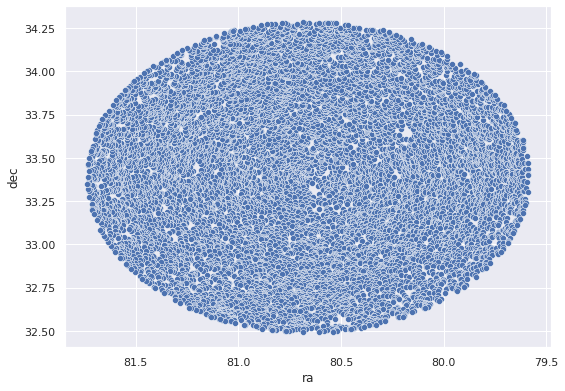

In [8]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()

#### Finding Cantat Data

In [9]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [10]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [11]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [12]:
# help(Vizier)

In [13]:
## saving only NGC 1893 data from Cantat

cantat_1893 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_1893")
cantat_1893 = cantat_1893[0].to_pandas()
cantat_1893

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,81.149455,33.284768,182470723501404800,0.3615,0.117,-0.714,NaN,17.414000,1.2091,0.1,NGC_1893,81.149455,33.284771
1,81.119439,33.363766,182472308346167936,0.2641,-0.608,-0.591,39.269804,13.264800,1.9393,0.1,NGC_1893,81.119442,33.363768
2,81.131238,33.508885,182486842515427840,0.1172,0.070,-0.804,NaN,16.060801,1.9589,0.2,NGC_1893,81.131237,33.508888
3,81.006873,33.548464,182490690806147712,0.2768,-0.094,-1.682,NaN,14.954500,1.8016,0.8,NGC_1893,81.006874,33.548471
4,81.122228,33.440556,182485949162263680,0.2378,0.316,-1.816,NaN,17.271099,1.3154,0.3,NGC_1893,81.122226,33.440563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,80.738744,33.441257,181174128709666304,0.3098,-0.185,-1.245,NaN,14.454100,0.5358,0.9,NGC_1893,80.738745,33.441263
490,80.759437,33.527037,181177044990761088,0.3628,-0.031,-0.890,NaN,11.109000,0.3429,0.5,NGC_1893,80.759438,33.527041
491,80.486479,33.742721,181197695194288640,0.3737,0.487,-1.105,NaN,17.628500,1.3684,0.1,NGC_1893,80.486477,33.742726
492,80.688044,33.406547,181173643374509824,0.3148,-0.548,-1.372,NaN,12.207800,0.4295,0.6,NGC_1893,80.688047,33.406553


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_1893 = cantat_1893.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_1893 = cantat_1893.loc[:,['source_id', 'PMemb']]


In [16]:
cantat_1893.isnull().sum()

source_id    0
PMemb        0
dtype: int64

In [17]:
# join the two table on source_id
cantat_1893 = all_stars[all_stars['parallax_over_error'] > 5].join(cantat_1893.set_index('source_id'), on='source_id')

In [18]:
cantat_1893.isnull().sum()

solution_id                 0
designation                 0
source_id                   0
random_index                0
ref_epoch                   0
                        ...  
lum_percentile_upper     5185
datalink_url                0
epoch_photometry_url        0
dist                        0
PMemb                   12797
Length: 98, dtype: int64

In [19]:
cantat_1893.shape

(12896, 98)

In [20]:
cantat_1893.dropna(subset=['PMemb']).shape

(99, 98)

In [21]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1893 = cantat_1893.dropna(subset=['PMemb'])
cantat_1893

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
28,1635721458409799680,Gaia DR2 181173441514942336,181173441514942336,1354923743,2015.5,80.672936,0.044613,33.384418,0.032364,0.279009,0.041563,6.712915,-0.186406,0.081357,-1.609973,0.051406,-0.539708,0.024442,-0.562214,0.589747,-0.240073,0.459728,-0.644438,0.363260,0.183228,-0.422729,142,0,142,0,0.747658,149.046036,0.000000,0.000000,31,False,44.469986,1.637182,0.008829,-0.182636,...,129.242800,190.731491,13.782348,1.232768,0,0.778579,0.287061,0.491518,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.602548,-1.703050,82.096723,10.200671,100001,5861.000000,5652.966797,6197.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.011418,0.9
69,1635721458409799680,Gaia DR2 181173402856344704,181173402856344704,1083987017,2015.5,80.665346,0.051863,33.371732,0.039550,0.355671,0.056363,6.310420,-0.404865,0.098256,-1.469104,0.064421,-0.340774,0.121734,-0.408987,0.434991,-0.309844,0.276899,-0.544547,0.357247,0.247405,-0.218139,150,150,150,0,4.962319,246.035080,0.000000,0.000000,31,False,285.341278,1.621134,0.010479,-0.142878,...,1530.283723,801.410828,9.540352,1.203930,0,0.760005,0.302708,0.457297,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.609423,-1.715455,82.089452,10.188427,100001,5953.000000,5883.000000,6154.109863,NaN,NaN,NaN,NaN,NaN,NaN,200111,22.728323,21.267118,23.272415,584.484497,460.900482,708.068481,https://gea.esac.esa.int/data-server/datalink/...,,0.018358,0.7
82,1635721458409799680,Gaia DR2 181173540295297152,181173540295297152,19363156,2015.5,80.683395,0.042702,33.383687,0.029753,0.221355,0.041037,5.394092,-0.121100,0.077915,-1.538002,0.048452,-0.534487,0.092364,-0.534014,0.608454,-0.176262,0.470998,-0.654111,0.418130,0.189785,-0.426529,127,0,126,1,-0.324164,115.379860,0.000000,0.000000,31,False,96.434502,1.671193,0.008347,-0.157306,...,154.353673,303.982788,13.083505,1.216637,0,0.540833,0.178650,0.362184,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608095,-1.696263,82.105529,10.199369,100001,6986.992676,6715.767090,7346.000000,1.3080,0.9975,1.5966,0.6340,0.4979,0.789,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.019793,0.9
133,1635721458409799680,Gaia DR2 181173544594151424,181173544594151424,708372502,2015.5,80.691077,0.049273,33.388175,0.039592,0.336855,0.054941,6.131197,-0.204878,0.089778,-1.517593,0.062607,-0.276054,0.191169,-0.300199,0.437140,-0.399575,0.261741,-0.449289,0.282922,0.297939,-0.112558,140,122,138,2,6.682558,273.391785,0.000000,0.000000,31,True,237.863861,1.683091,0.012412,-0.105379,...,167.420012,614.880920,12.230424,1.203018,0,0.429568,0.137908,0.291660,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608023,-1.688435,82.112330,10.203429,100001,7757.000000,7431.279785,8459.

In [22]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1893.to_csv('NGC_1893_cantat.csv')
# all_stars.to_csv('NGC_1893_Gaia_30m.csv')

In [23]:
cantat_1893.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,9.900000e+01,9.900000e+01,9.900000e+01,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,2.000000,2.000000,99.000000,2.000000,2.000000,2.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,99.000000,99.000000
mean,1.635721e+18,1.814353e+17,9.075314e+08,2015.5,80.747500,0.041009,33.443558,0.033017,0.305433,0.045916,6.859564,-0.188615,0.078698,-1.361384,0.055612,-0.178605,0.164131,-0.252330,0.272117,-0.377863,0.171102,-0.511712,0.155069,0.337855,-0.085752,148.959596,14.121212,148.181818,0.777778,-0.092885,147.444580,0.011407,0.218452,31.0,64.366661,1.575603,0.008952,-0.097976,16.909091,10.303030,...,14.713500,15.444444,5.715839e+04,140.445390,518.559692,13.713282,1.255542,0.060606,1.000219,0.418706,0.581513,18.699157,0.960644,0.080808,5750.000000,4.000000,0.0,173.588825,-1.618222,82.163728,10.255735,100021.262626,5715.146484,5501.210938,6110.693359,1.306397,1.058595,1.661015,0.650430,0.523787,0.832880,200111.0,7.435204,6.378483,8.135204,72.355545,54.608341,90.102745,0.202992,0.583838
std,0.000000e+00,6.053841e+14,5.240856e+08,0.0,0.194423,0.011133,0.149213,0.008420,0.052536,0.010143,1.501217,0.369778,0.020132,0.324076,0.014273,0.204680,0.125329,0.147170,0.161773,0.096562,0.151524,0.117939,0.119745,0.102719,0.190105,19.880726,41.395621,19.697386,1.191428,3.065744,69.150291,0.034628,0.871172,0.0,76.476768,0.092966,0.002125,0.077592,2.213552,0.734771,...,1.302472,2.843619,1.397741e+05,381.853021,478.822906,1.149414,0.050021,0.239821,0.483202,0.268190,0.217620,29.091288,0.217557,0.633693,353.553406,0.707107,0.0,0.140135,0.170210,0.166565,0.147400,201.001553,1182.209351,1145.896973,1190.838257,0.372275,0.363229,0.425162,0.185375,0.175645,0.220638,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921814,0.123273,0.344552
min,1.635721e+18,1.809519e+17,6.862069e+06,2015.5,80.190774,0.025518,33.063148,0.020848,0.205932,0.027534,5.014656,-1.120928,0.049882,-2.314877,0.035424,-0.756741,-0.100532,-0.656294,-0.131934,-0.638753,-0.169092,-0.772315,-0.130885,0.014066,-0.571239,88.000000,0.000000,87.000000,0.000000,-5.626834,65.433289,0.000000,0.000000,31.0,6.368932,1.351176,0.005114,-

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


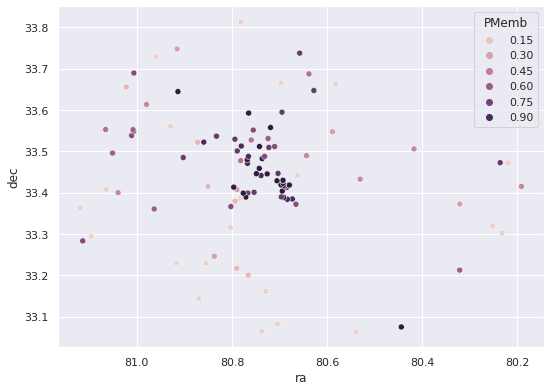

In [24]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_1893['ra'], cantat_1893['dec'], hue = cantat_1893['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [25]:
# import member dataset
member = cantat_1893.copy()

In [26]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1893_center'] = distance

In [27]:
member['PMemb'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb,dist_1893_center
28,1635721458409799680,Gaia DR2 181173441514942336,181173441514942336,1354923743,2015.5,80.672936,0.044613,33.384418,0.032364,0.279009,0.041563,6.712915,-0.186406,0.081357,-1.609973,0.051406,-0.539708,0.024442,-0.562214,0.589747,-0.240073,0.459728,-0.644438,0.363260,0.183228,-0.422729,142,0,142,0,0.747658,149.046036,0.0,0.0,31,False,44.469986,1.637182,0.008829,-0.182636,...,190.731491,13.782348,1.232768,0,0.778579,0.287061,0.491518,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.602548,-1.703050,82.096723,10.200671,100001,5861.000000,5652.966797,6197.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.011418,1,0.011427
69,1635721458409799680,Gaia DR2 181173402856344704,181173402856344704,1083987017,2015.5,80.665346,0.051863,33.371732,0.039550,0.355671,0.056363,6.310420,-0.404865,0.098256,-1.469104,0.064421,-0.340774,0.121734,-0.408987,0.434991,-0.309844,0.276899,-0.544547,0.357247,0.247405,-0.218139,150,150,150,0,4.962319,246.035080,0.0,0.0,31,False,285.341278,1.621134,0.010479,-0.142878,...,801.410828,9.540352,1.203930,0,0.760005,0.302708,0.457297,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.609423,-1.715455,82.089452,10.188427,100001,5953.000000,5883.000000,6154.109863,NaN,NaN,NaN,NaN,NaN,NaN,200111,22.728323,21.267118,23.272415,584.484497,460.900482,708.068481,https://gea.esac.esa.int/data-server/datalink/...,,0.018358,1,0.018365
82,1635721458409799680,Gaia DR2 181173540295297152,181173540295297152,19363156,2015.5,80.683395,0.042702,33.383687,0.029753,0.221355,0.041037,5.394092,-0.121100,0.077915,-1.538002,0.048452,-0.534487,0.092364,-0.534014,0.608454,-0.176262,0.470998,-0.654111,0.418130,0.189785,-0.426529,127,0,126,1,-0.324164,115.379860,0.0,0.0,31,False,96.434502,1.671193,0.008347,-0.157306,...,303.982788,13.083505,1.216637,0,0.540833,0.178650,0.362184,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608095,-1.696263,82.105529,10.199369,100001,6986.992676,6715.767090,7346.000000,1.3080,0.9975,1.5966,0.634,0.4979,0.789,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.019793,1,0.019802
133,1635721458409799680,Gaia DR2 181173544594151424,181173544594151424,708372502,2015.5,80.691077,0.049273,33.388175,0.039592,0.336855,0.054941,6.131197,-0.204878,0.089778,-1.517593,0.062607,-0.276054,0.191169,-0.300199,0.437140,-0.399575,0.261741,-0.449289,0.282922,0.297939,-0.112558,140,122,138,2,6.682558,273.391785,0.0,0.0,31,True,237.863861,1.683091,0.012412,-0.105379,...,614.880920,12.230424,1.203018,0,0.429568,0.137908,0.291660,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608023,-1.688435,82.112330,10.203429,100001,7757.000000,7431.279785,8459.333008,1.1892,0.9895,1.4111,0.598,0.4663,0.706,200111,4.473893,3.761845,

In [28]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1893_center'] = distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


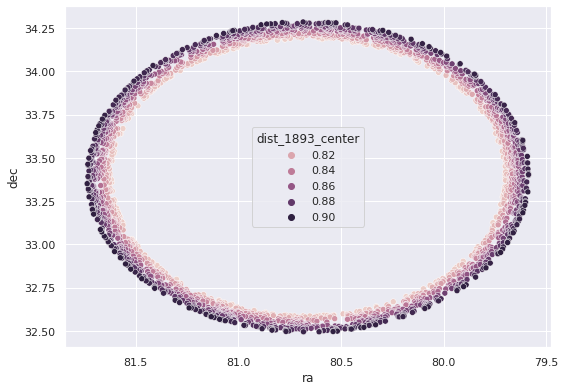

In [29]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1893_center', 
                          data = all_stars_filtered[all_stars_filtered.dist_1893_center >= 0.8])
skyplot.invert_xaxis()

In [30]:
non_member = all_stars_filtered[all_stars_filtered['dist_1893_center'] >= 0.8].sample(len(member))

In [31]:
non_member['PMemb'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1893_center,PMemb
94387,1635721458409799680,Gaia DR2 181220720514781184,181220720514781184,754363761,2015.5,79.659367,0.038936,33.514879,0.029610,0.204891,0.037274,5.496956,1.421909,0.074970,-3.040315,0.048395,-0.261046,0.073411,-0.467277,0.368015,-0.096368,0.354857,-0.574304,0.245540,0.104348,-0.103347,167,0,167,0,4.722138,261.811676,0.135899,3.26047,31,False,27.024017,1.345769,0.007803,-0.045795,...,683.029785,12.996301,1.399583,1,2.258223,1.178247,1.079975,-29.504332,1.760877,4,4000.0,3.0,0.0,NOT_AVAILABLE,173.012890,-2.323489,81.248403,10.389213,100002,3756.053467,3445.000000,4359.285156,1.7170,1.4259,2.0790,0.8522,0.6923,1.0528,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.844870,0.844269,0
104769,1635721458409799680,Gaia DR2 181984674937858688,181984674937858688,339637753,2015.5,79.719668,0.028973,33.811759,0.023630,0.581989,0.032716,17.789036,-0.041321,0.056786,-5.445836,0.038405,-0.224224,0.138456,-0.365936,0.280569,-0.451371,0.125225,-0.516328,0.240865,0.319423,-0.070390,156,0,155,1,-2.712232,107.222389,0.000000,0.00000,31,False,68.249771,1.587843,0.006786,-0.091828,...,983.938354,13.318559,1.218651,0,0.894659,0.364182,0.530477,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,172.798450,-2.111968,81.321186,10.681679,100001,5587.187012,5480.199707,5828.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.707211,2.487682,2.813946,6.434454,5.574469,7.294439,https://gea.esac.esa.int/data-server/datalink/...,,0.890286,0.888590,0
95492,1635721458409799680,Gaia DR2 180889870595066112,180889870595066112,1108570696,2015.5,81.203698,0.039446,32.671849,0.029891,0.403087,0.042114,9.571411,-1.578065,0.071001,0.005877,0.050034,-0.312228,0.288765,-0.267794,0.415420,-0.328973,0.269443,-0.457155,0.240844,0.277844,-0.165602,166,113,164,2,0.596851,169.186844,0.000000,0.00000,31,True,179.976562,1.445769,0.007192,-0.124163,...,1467.737793,11.999498,1.299755,0,1.679730,0.807535,0.872195,2.699305,2.339036,5,4500.0,3.0,0.0,NOT_AVAILABLE,174.442334,-1.737125,82.501449,9.461251,100001,4268.000000,4200.500000,4485.126465,0.8077,0.6489,1.4537,0.3840,0.3180,0.6543,200111,12.462299,11.284897,12.866043,46.428932,38.623257,54.234608,https://gea.esac.esa.int/data-server/datalink/...,,0.849973,0.850975,0
99807,1635721458409799680,Gaia DR2 182760169937149824,182760169937149824,799058295,2015.5,80.735656,0.035997,34.255990,0.041336,0.625607,0.045889,13.633137,0.898399,0.072996,-4.002248,0.065288,0.398039,-0.041798,-0.461159,-0.307798,-0.626348,-0.510716,-0.798086,0.468236,0.604322,0.532833,118,0,118,0,-2.933914,73.879951,0.000000,0.00000,31,False,84.359116,1.657672,0.006678,0.117208,...,754.689148,13.260493,1.194091,0,0.576822,0.216700,0.360123,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,172.913167,-1.166945,82.207

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


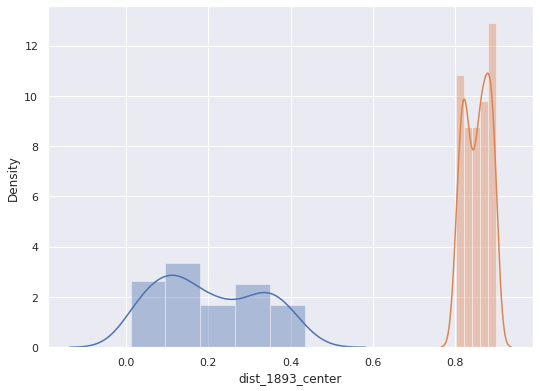

In [32]:
sns.distplot(member['dist_1893_center'])
sns.distplot(non_member['dist_1893_center'])

In [33]:
training_data = pd.concat([member, non_member])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


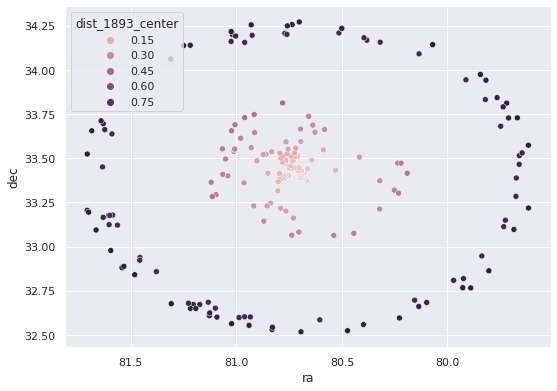

In [34]:
skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1893_center', 
                          data = training_data)
skyplot.invert_xaxis()

In [35]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1893_center
count,1.980000e+02,1.980000e+02,1.980000e+02,198.0,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,1.980000e+02,198.0,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,8.000000,8.000000,198.000000,8.000000,8.000000,8.000000,198.000000,198.000000,198.000000,198.000000,188.000000,188.000000,188.000000,188.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,198.000000,198.000000,198.000000
mean,1.635721e+18,1.815900e+17,8.279940e+08,2015.5,80.734314,0.054869,33.392327,0.044007,0.586610,0.061540,10.232373,0.485347,0.109650,-2.922299,0.077472,-0.186297,0.154130,-0.227723,0.259532,-0.373573,0.170094,-0.482560,0.142962,0.342446,-0.124034,152.489899,13.429293,151.676768,0.813131,0.267620,160.952332,0.041448,7.001743e-01,31.0,49.736359,1.546304,0.011953,-0.096772,17.358586,10.333333,...,15.777778,4.396715e+04,99.061468,477.474091,14.224106,1.271801,0.045455,1.142094,0.492752,0.649342,2.913959,2.405343,0.171717,5250.000000,3.437500,-0.375000,173.624272,-1.655457,82.149458,10.205985,100022.324468,5409.119141,5219.920410,5738.410156,1.046336,0.799936,1.333582,0.517903,0.395534,0.669535,200111.0,3.984105,3.494845,4.305511,27.928343,21.267269,34.589409,0.527921,0.500000,0.527976
std,0.000000e+00,7.179533e+14,4.998478e+08,0.0,0.519055,0.043818,0.450031,0.034233,0.532909,0.047743,7.387448,2.585255,0.090724,3.678795,0.063509,0.183255,0.134128,0.173284,0.174141,0.111229,0.152436,0.129331,0.141325,0.105749,0.206303,19.523184,42.067417,19.302996,1.344449,3.652502,109.076256,0.156005,4.396082e+00,0.0,72.309502,0.096750,0.009519,0.076409,2.188503,0.698076,...,2.543252,1.181811e+05,291.784984,397.279358,1.386307,0.089006,0.208827,0.495160,0.283344,0.221837,27.172755,2.522587,0.884616,801.783691,0.495516,0.694365,0.466387,0.416033,0.437366,0.452898,205.727082,1046.217651,1005.913208,1094.799927,0.456988,0.435636,0.543326,0.228273,0.211207,0.277109,0.0,4.407840,3.788068,4.784784,82.266068,62.489098,102.152817,0.337824,0.501267,0.337891
min,1.635721e+18,1.808416e+17,4.530393e+06,2015.5,79.616439,0.025518,32.517570,0.020848,0.204891,0.027534,5.014656,-13.724710,0.049882,-21.181388,0.035174,-0.756741,-0.117809,-0.656294,-0.463178,-0.675575,-0.510716,-0.798086,-0.390404,0.014066,-0.834790,88.000000,0.000000,87.00000

In [36]:
# correlation of PMemb with other variables
training_data.corr().PMemb.dropna().sort_values()

dist_1893_center               -0.964316
dist                           -0.964269
parallax                       -0.528964
parallax_over_error            -0.457716
phot_bp_mean_mag               -0.394760
                                  ...   
e_bp_min_rp_percentile_lower    0.557508
radius_val                      0.569140
radius_percentile_upper         0.581820
rv_template_logg                0.700649
PMemb                           1.000000
Name: PMemb, Length: 90, dtype: float64

In [37]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['PMemb']

In [38]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,198.000000,198.000000,198.000000
mean,0.586610,0.485347,-2.922298
std,0.532909,2.585256,3.678795
min,0.204891,-13.724710,-21.181387
25%,0.292409,-0.376427,-3.073607
50%,0.370059,-0.029409,-1.501064
75%,0.678779,0.889126,-1.204498
max,4.695555,12.147102,2.206161


In [39]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


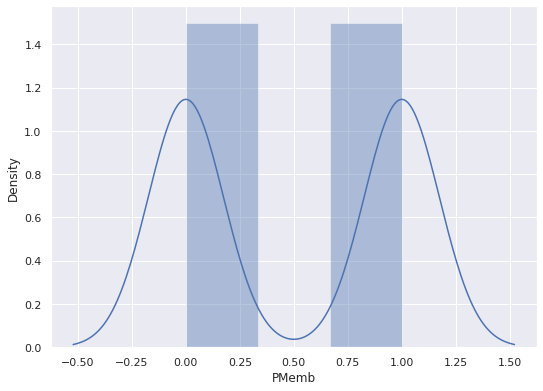

In [40]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [41]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

99

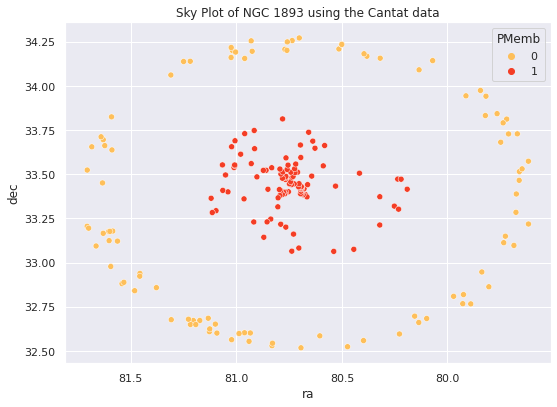

In [42]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'PMemb', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 1893 using the Cantat data')
plt.show()

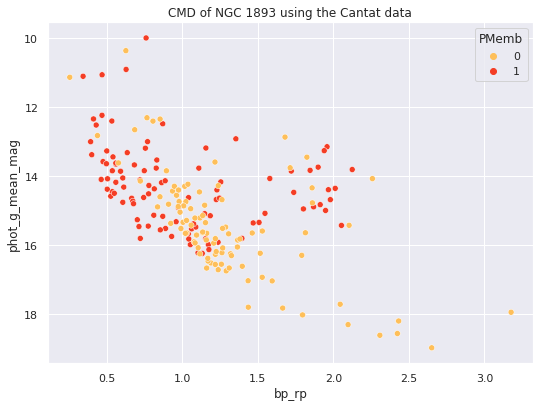

In [43]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
cmd.invert_yaxis()
plt.title('CMD of NGC 1893 using the Cantat data')
plt.show()

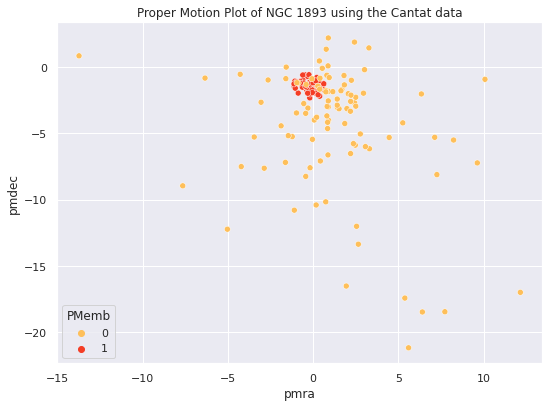

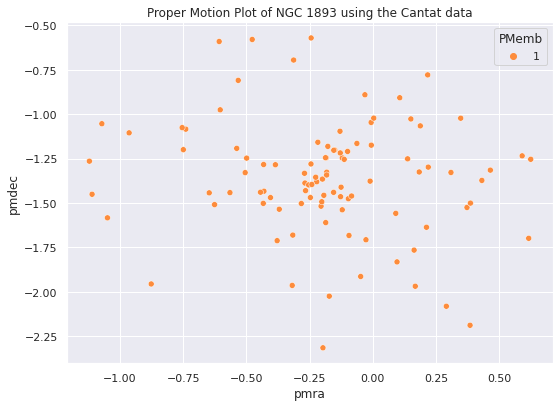

In [44]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 1893 using the Cantat data')
plt.show()
pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = member)
plt.title('Proper Motion Plot of NGC 1893 using the Cantat data')
plt.show()

In [45]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.734892
pmra        0.180109
pmdec       0.084999
dtype: float64

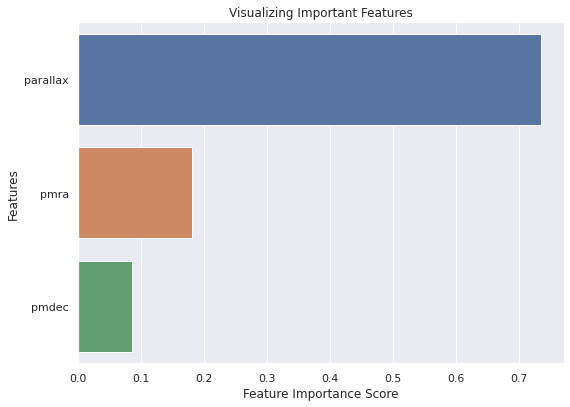

In [47]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [48]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [49]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [50]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.715741550925926

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


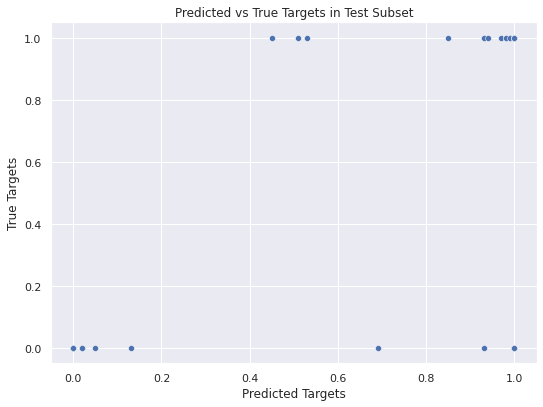

In [52]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [53]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [54]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.48408711916070535, 0.5730612998057331, 0.6582195225489198, 0.7179575273641827, 0.7335439244116302, 0.7705486878517614, 0.7744114088719597, 0.7954925413355154, 0.7560070489522468, 0.8017313399716286, 0.7718555034091986, 0.7782314350408794, 0.8054917936982384, 0.8163651943978495, 0.7902992262862001, 0.84558318244696, 0.8574764173173317, 0.8278432558413809, 0.8028179999999997]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


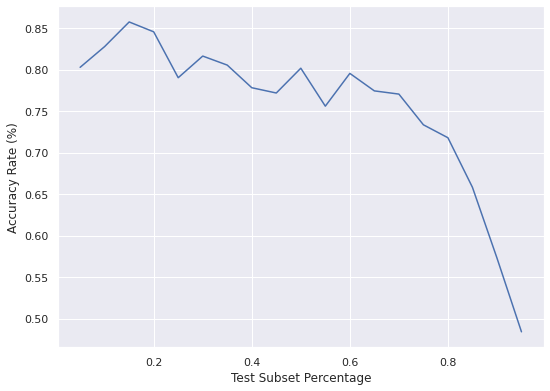

In [55]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [56]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1893_center
count,1.289600e+04,1.289600e+04,1.289600e+04,12896.0,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.0,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,12896.000000,...,12809.000000,12896.000000,1.281000e+04,1.281000e+04,12810.000000,12810.000000,12809.000000,12896.000000,12809.000000,12809.000000,12810.000000,562.000000,562.000000,12896.000000,562.000000,562.000000,562.000000,12896.000000,12896.000000,12896.000000,12896.000000,10259.000000,10259.000000,10259.000000,10259.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,6229.000000,7711.0,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000,12896.000000,12896.000000
mean,1.635721e+18,1.816492e+17,8.438701e+08,2015.5,80.677634,0.084898,33.398834,0.068016,1.086155,0.093816,15.471703,1.970300,0.177446,-5.413192,0.126279,-0.167037,0.123158,-0.215219,0.238978,-0.338578,0.187007,-0.444379,0.109561,0.335833,-0.181647,153.004575,9.539935,152.127094,0.877481,1.121514,266.917603,0.118833,4.688660,31.0,33.429806,1.501730,0.018222,-0.087345,17.466811,10.296293,...,16.320560,15.598170,5.269385e+04,2.639897e+02,391.900757,14.952946,1.302585,0.059708,1.367851,0.613947,0.753984,3.381142,2.351044,0.219525,5316.547852,3.547153,-0.079626,173.591920,-1.690959,82.101730,10.215637,100026.988108,5025.689453,4847.401367,5293.424805,0.809914,0.585395,1.063773,0.400753,0.287964,0.527982,200111.0,2.404127,2.168493,2.585511,7.489456,6.209379,8.769514,0.598963,0.598941
std,0.000000e+00,7.428518e+14,4.865463e+08,0.0,0.536724,0.090045,0.448999,0.071648,1.196153,0.099246,18.631943,8.151945,0.196991,11.162698,0.138833,0.184513,0.153218,0.191862,0.193284,0.121486,0.146780,0.140948,0.169924,0.119545,0.204501,19.172903,36.941732,19.074184,1.424551,8.099106,2368.717529,0.354055,77.041911,0.0,70.371315,0.099299,0.018730,0.070645,2.139127,0.773387,...,1.869186,2.826942,8.600272e+05,1.416520e+04,286.103119,1.570492,0.132096,0.261535,0.497481,0.289360,0.224365,32.309941,2.851033,1.088967,679.330566,0.620506,0.333108,0.448178,0.449095,0.455402,0.448897,226.282491,748.906921,721.794250,793.097900,0.464434,0.425725,0.526926,0.231715,0.210090,0.265937,0.0,4.233188,3.774271,4.588603,39.621124,33.548237,45.841228,0.209499,0.209487
min,1.635721e+18,1.808286e+17,6.911600e+04,2015.5,79.585902,0.020815,32.494056,0.016609,0.161529,0.022131,5.000328,-80.417052,

In [57]:
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)

In [58]:
# select the set of predictor variables from the new dataset
new_features = all_stars_filtered.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [59]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
# estimate the membership probability of the stars
all_stars_filtered['PMemb'] = rfr.predict(new_features)
sum(all_stars_filtered['PMemb'] >= 0.5)

671

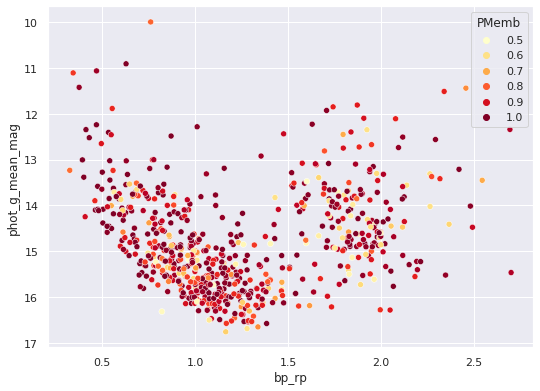

In [61]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
cmd.invert_yaxis()

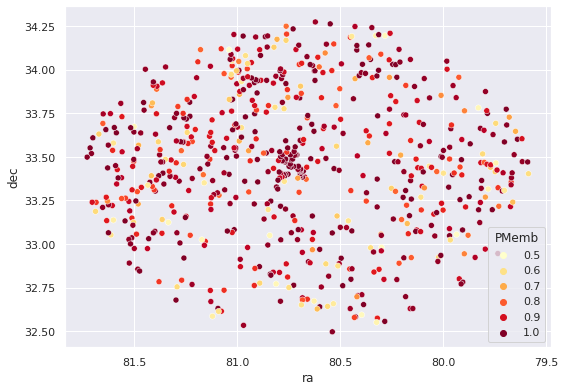

In [62]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

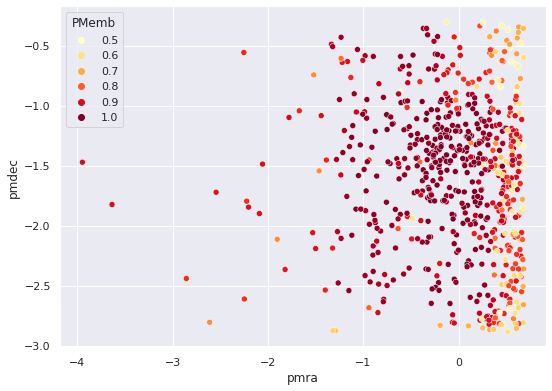

In [63]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )

In [64]:
potentialMember = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5]
len(potentialMember)

671

In [65]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1893_center,PMemb
count,6.710000e+02,6.710000e+02,6.710000e+02,671.0,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.0,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,6.710000e+02,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,38.000000,38.000000,671.000000,38.000000,38.000000,38.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,671.000000,671.000000,671.000000
mean,1.635721e+18,1.817583e+17,8.622322e+08,2015.5,80.717242,0.041360,33.457508,0.033324,0.324535,0.045852,7.452922,-0.050739,0.082282,-1.596651,0.058038,-0.140321,0.142023,-0.240848,0.245776,-0.335274,0.186457,-0.464610,0.113934,0.327587,-0.106074,158.570790,8.062593,157.774963,0.795827,-0.188186,154.034409,0.017814,0.329622,31.0,43.089943,1.531062,0.009136,-0.075371,18.076006,10.511177,...,16.499255,3.516576e+04,66.429813,541.682983,14.121611,1.270575,0.050671,1.238079,0.552489,0.685590,-3.796093,2.096471,0.278689,5078.947266,3.394737,-0.078947,173.562190,-1.630558,82.139100,10.272028,100004.031297,5081.187500,4883.829102,5400.214844,1.347261,1.107353,1.724375,0.666296,0.544185,0.861789,200111.0,7.166615,6.305295,7.754675,34.905567,26.637321,43.173771,0.566788,0.566735,0.895291
std,0.000000e+00,7.454978e+14,4.953313e+08,0.0,0.537115,0.011365,0.407674,0.008935,0.057745,0.011839,2.123384,0.645373,0.023651,0.635514,0.017109,0.161672,0.118947,0.135880,0.144587,0.102962,0.127994,0.117529,0.121973,0.087486,0.161797,17.836086,33.219922,17.704499,1.359888,2.708085,61.437340,0.046523,1.327200,0.0,62.574688,0.090730,0.002550,0.063645,1.977154,0.632062,...,2.276338,7.450309e+04,169.193983,310.867798,1.095267,0.054280,0.219488,0.484920,0.279669,0.207145,27.464306,2.656103,1.208728,551.733276,0.534713,0.339442,0.415363,0.441260,0.456172,0.406933,77.207497,955.376282,908.092651,987.949158,0.405237,0.410001,0.457237,0.205004,0.204118,0.230599,0.0,6.874938,6.066598,7.414330,64.742302,49.417061,80.170288,0.228789,0.228768,0.129358
min,1.635721e+18,1.808295e+17,8.270400e+05,2015.5,79.585902,0.021950,32.495724,0.017396,0.161529,0.022973,5.014656,-3.946473,0.042718,-2.884257,0.030623,-0.756741,-0.277021,-0.683510,-0.178851,-0.638753,-0.211288,-0.792226,-0.571098,0.014066,-0.735982,88.000000,0.000000,87.0000

In [66]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1893_center
count,9.900000e+01,9.900000e+01,9.900000e+01,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,2.000000,2.000000,99.000000,2.000000,2.000000,2.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,99.000000,99.0,99.000000
mean,1.635721e+18,1.814353e+17,9.075314e+08,2015.5,80.747500,0.041009,33.443558,0.033017,0.305433,0.045916,6.859564,-0.188615,0.078698,-1.361384,0.055612,-0.178605,0.164131,-0.252330,0.272117,-0.377863,0.171102,-0.511712,0.155069,0.337855,-0.085752,148.959596,14.121212,148.181818,0.777778,-0.092885,147.444580,0.011407,0.218452,31.0,64.366661,1.575603,0.008952,-0.097976,16.909091,10.303030,...,15.444444,5.715839e+04,140.445390,518.559692,13.713282,1.255542,0.060606,1.000219,0.418706,0.581513,18.699157,0.960644,0.080808,5750.000000,4.000000,0.0,173.588825,-1.618222,82.163728,10.255735,100021.262626,5715.146484,5501.210938,6110.693359,1.306397,1.058595,1.661015,0.650430,0.523787,0.832880,200111.0,7.435204,6.378483,8.135204,72.355545,54.608341,90.102745,0.202992,1.0,0.202966
std,0.000000e+00,6.053841e+14,5.240856e+08,0.0,0.194423,0.011133,0.149213,0.008420,0.052536,0.010143,1.501217,0.369778,0.020132,0.324076,0.014273,0.204680,0.125329,0.147170,0.161773,0.096562,0.151524,0.117939,0.119745,0.102719,0.190105,19.880726,41.395621,19.697386,1.191428,3.065744,69.150291,0.034628,0.871172,0.0,76.476768,0.092966,0.002125,0.077592,2.213552,0.734771,...,2.843619,1.397741e+05,381.853021,478.822906,1.149414,0.050021,0.239821,0.483202,0.268190,0.217620,29.091288,0.217557,0.633693,353.553406,0.707107,0.0,0.140135,0.170210,0.166565,0.147400,201.001553,1182.209351,1145.896973,1190.838257,0.372275,0.363229,0.425162,0.185375,0.175645,0.220638,0.0,5.044431,4.305860,5.516739,129.711990,98.694420,160.921814,0.123273,0.0,0.123247
min,1.635721e+18,1.809519e+17,6.862069e+06,2015.5,80.190774,0.025518,33.063148,0.020848,0.205932,0.027534,5.014656,-1.120928,0.049882,-2.314877,0.035424,-0.756741,-0.100532,-0.656294,-0.131934,-0.638753,-0.169092,-0.772315,-0.130885,0.014066,-0.571239,88.000000,0.000000,87.000000,0.000000,-5.626834,65.433289,0.000000,0.000000,31.0,6.368932,1.351176,0.005114,-0.317101,10.0000

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


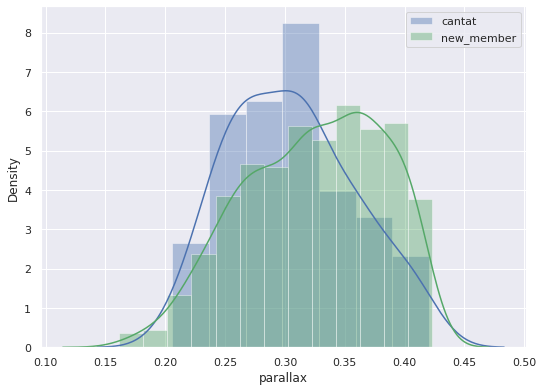

In [67]:
sns.distplot(member['parallax'], color = 'b', label = 'cantat', kde=True)
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', kde=True)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


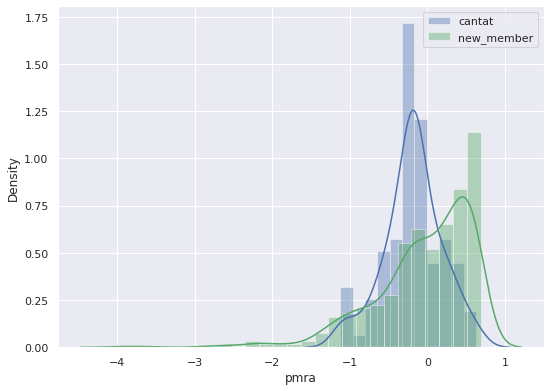

In [68]:
sns.distplot(member['pmra'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


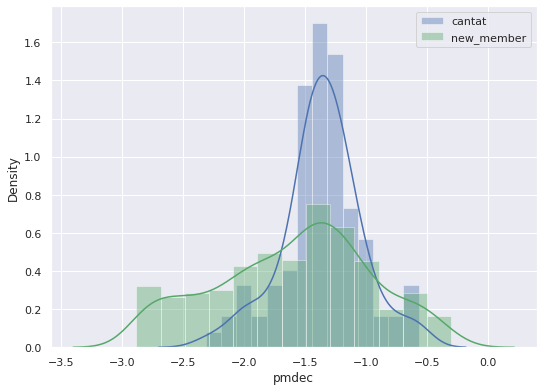

In [69]:
sns.distplot(member['pmdec'], color = 'b', label = 'cantat')
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member')
plt.legend()
plt.show()

In [70]:
# saving the files as csv
# all_stars.to_csv('gaia_1893_membership_prob.csv')

potentialMember.to_csv('NGC_1893_membership_prob.csv')


### Comparing the new and old probable members

In [71]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [72]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1893_center,PMemb,dataset
28,1635721458409799680,Gaia DR2 181173441514942336,181173441514942336,1354923743,2015.5,80.672936,0.044613,33.384418,0.032364,0.279009,0.041563,6.712915,-0.186406,0.081357,-1.609973,0.051406,-0.539708,0.024442,-0.562214,0.589747,-0.240073,0.459728,-0.644438,0.363260,0.183228,-0.422729,142,0,142,0,0.747658,149.046036,0.000000,0.000000,31,False,44.469986,1.637182,0.008829,-0.182636,...,13.782348,1.232768,0,0.778579,0.287061,0.491518,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.602548,-1.703050,82.096723,10.200671,100001,5861.000000,5652.966797,6197.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.011418,0.011427,0.95,New_member
69,1635721458409799680,Gaia DR2 181173402856344704,181173402856344704,1083987017,2015.5,80.665346,0.051863,33.371732,0.039550,0.355671,0.056363,6.310420,-0.404865,0.098256,-1.469104,0.064421,-0.340774,0.121734,-0.408987,0.434991,-0.309844,0.276899,-0.544547,0.357247,0.247405,-0.218139,150,150,150,0,4.962319,246.035080,0.000000,0.000000,31,False,285.341278,1.621134,0.010479,-0.142878,...,9.540352,1.203930,0,0.760005,0.302708,0.457297,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.609423,-1.715455,82.089452,10.188427,100001,5953.000000,5883.000000,6154.109863,NaN,NaN,NaN,NaN,NaN,NaN,200111,22.728323,21.267118,23.272415,584.484497,460.900482,708.068481,https://gea.esac.esa.int/data-server/datalink/...,,0.018358,0.018365,0.79,New_member
82,1635721458409799680,Gaia DR2 181173540295297152,181173540295297152,19363156,2015.5,80.683395,0.042702,33.383687,0.029753,0.221355,0.041037,5.394092,-0.121100,0.077915,-1.538002,0.048452,-0.534487,0.092364,-0.534014,0.608454,-0.176262,0.470998,-0.654111,0.418130,0.189785,-0.426529,127,0,126,1,-0.324164,115.379860,0.000000,0.000000,31,False,96.434502,1.671193,0.008347,-0.157306,...,13.083505,1.216637,0,0.540833,0.178650,0.362184,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608095,-1.696263,82.105529,10.199369,100001,6986.992676,6715.767090,7346.000000,1.3080,0.9975,1.5966,0.6340,0.4979,0.789,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.019793,0.019802,1.00,New_member
133,1635721458409799680,Gaia DR2 181173544594151424,181173544594151424,708372502,2015.5,80.691077,0.049273,33.388175,0.039592,0.336855,0.054941,6.131197,-0.204878,0.089778,-1.517593,0.062607,-0.276054,0.191169,-0.300199,0.437140,-0.399575,0.261741,-0.449289,0.282922,0.297939,-0.112558,140,122,138,2,6.682558,273.391785,0.000000,0.000000,31,True,237.863861,1.683091,0.012412,-0.105379,...,12.230424,1.203018,0,0.429568,0.137908,0.291660,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.608023,-1.688435,82.112330,10.203429,100001,7757.000000,7431.279785,8459.333008,1.1892,0.9895,1.4111,0.5980,0.4663,0.706,200111

In [73]:
concatenated.dataset.value_counts()

New_member    671
Old_member     99
Name: dataset, dtype: int64

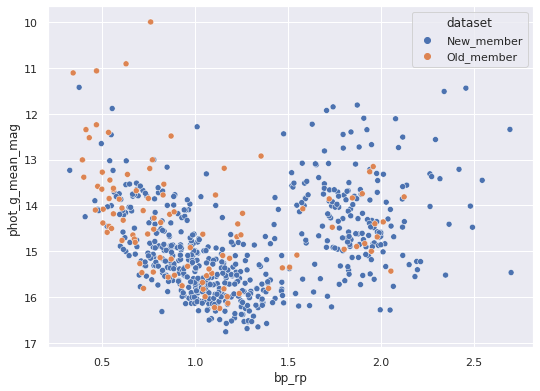

In [74]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

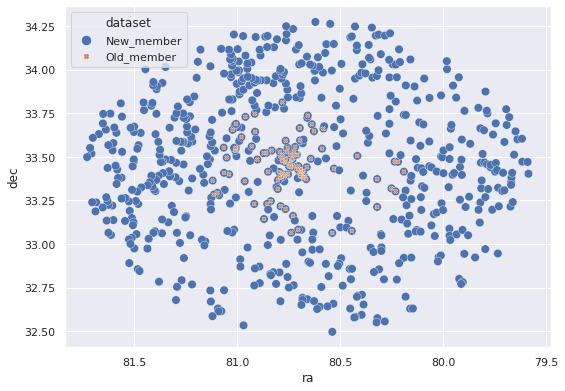

In [75]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='dataset', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

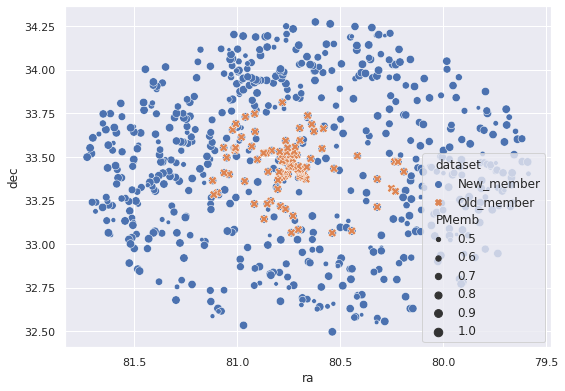

In [76]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

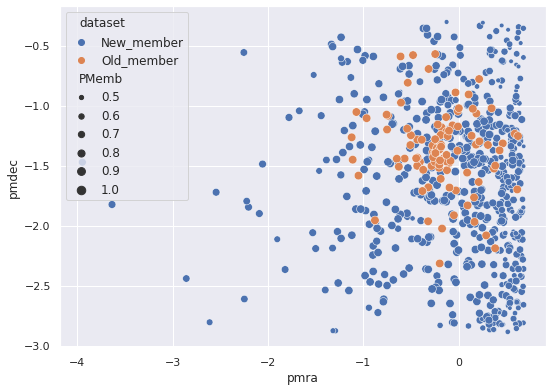

In [77]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [78]:
# pd_prof.ProfileReport(potentialMember)

In [79]:
#files.download('NGC_1893_cantat.csv')

files.download('NGC_1893_membership_prob.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


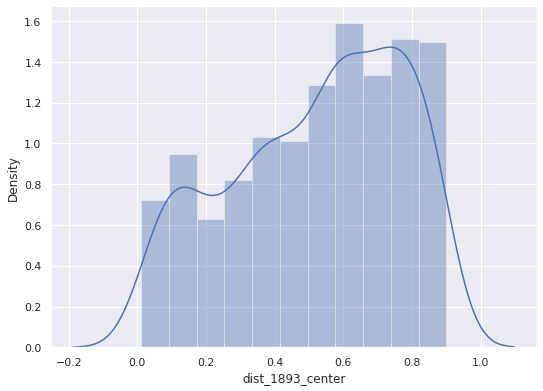

In [80]:
sns.distplot(concatenated['dist_1893_center'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


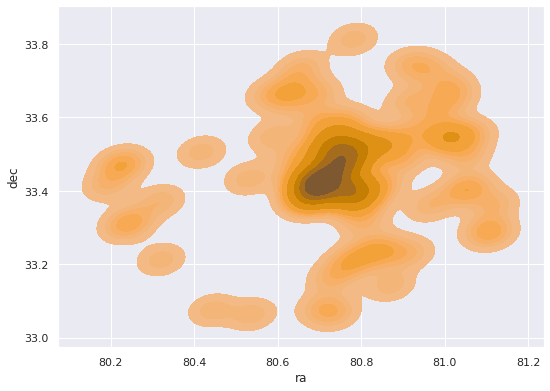

In [81]:
sns.kdeplot('ra', 'dec', data = member, shade=True, color = 'orange', bw = 0.20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


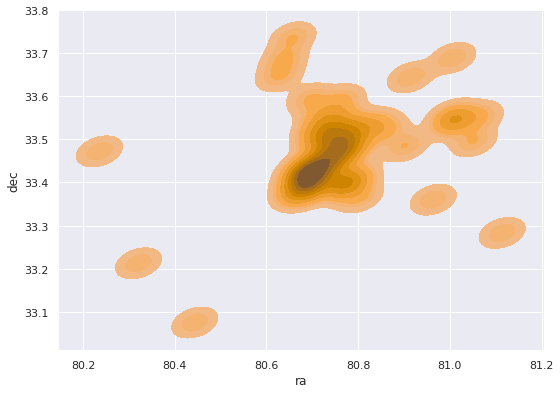

In [82]:
sns.kdeplot('ra', 'dec', data = cantat_1893[cantat_1893['PMemb'] >= 0.5], shade=True, color = 'orange', bw = 0.20)

In [83]:
len(cantat_1893[cantat_1893['PMemb'] >= 0.5])

61

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


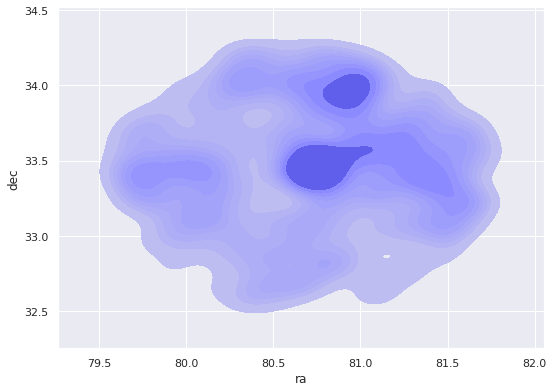

In [84]:
sns.kdeplot('ra', 'dec', data = potentialMember, shade=True, color = 'blue', bw = 0.20)

In [85]:
potentialMember['radial_velocity'].dropna()

11773     42.940018
12881    -24.975249
16484     46.978027
19438     39.269804
20426     -1.871490
20845    -23.006755
21362    -25.710734
22027     21.370130
26610      3.831324
27034     -9.470344
28773    -14.149599
29867     34.579026
35536      1.407608
38991    -20.655428
44294    -22.719427
47780     15.322275
48310    -26.708278
50390     13.133257
51602    -46.252230
53441    -24.886722
53677     40.256882
56881     12.164682
58123     -6.505322
62330      9.636079
62977    -10.145730
64398    -16.501090
66181    -40.546744
69393    -35.081845
71418    -14.748536
74004     17.614496
75360    -54.790364
75742    -47.965925
90551     -5.022355
90725      7.160913
97004     42.519224
99848     18.766873
103022    -8.249196
105531   -31.238786
Name: radial_velocity, dtype: float64

In [86]:
member['radial_velocity'].dropna()

19438    39.269804
20426    -1.871490
Name: radial_velocity, dtype: float64

In [87]:
member['radial_velocity_error'].dropna()

19438    1.114480
20426    0.806808
Name: radial_velocity_error, dtype: float64